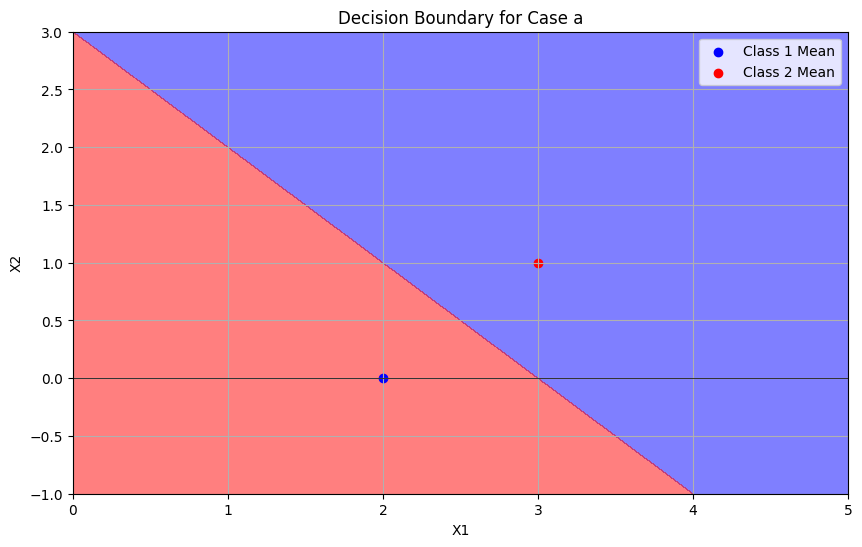

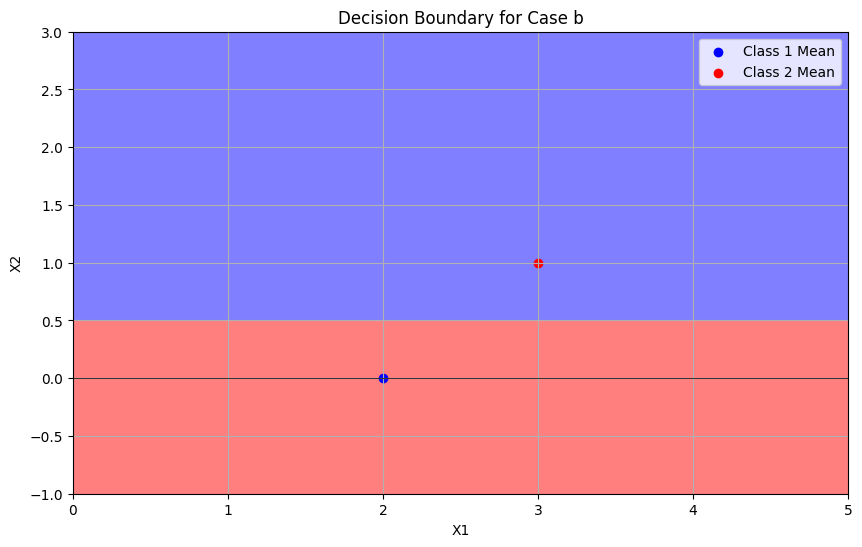

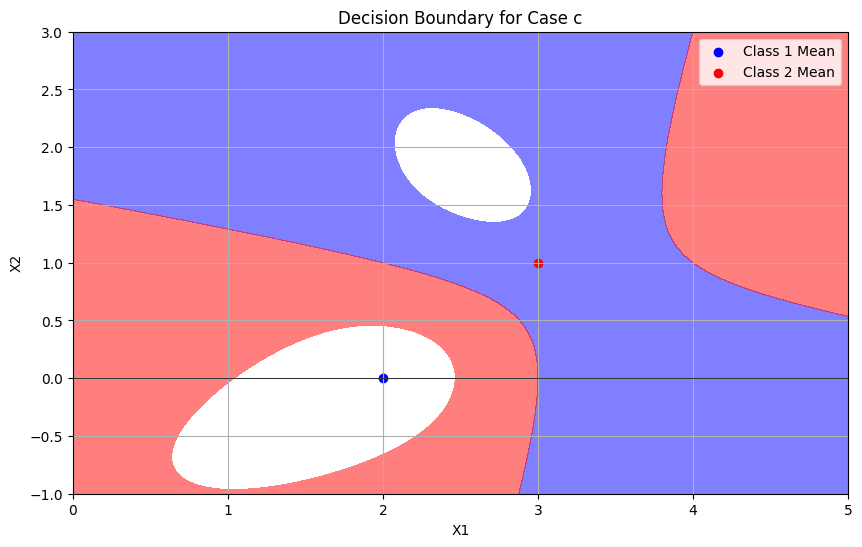

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(mu1, mu2, sigma1, sigma2, case):
    # Grid for plotting
    x_min, x_max = 0, 5
    y_min, y_max = -1, 3
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    # Compute the Gaussian likelihoods
    def gaussian_pdf(pos, mu, sigma):
        size = mu.shape[0]
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(np.linalg.det(sigma)))
        diff = pos - mu
        exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, np.linalg.inv(sigma), diff)
        return norm_const * np.exp(exponent)

    p1 = gaussian_pdf(pos, mu1, sigma1)
    p2 = gaussian_pdf(pos, mu2, sigma2)

    # Decision boundary
    decision_boundary = p1 - p2

    plt.figure(figsize=(10, 6))
    plt.contourf(x, y, decision_boundary, levels=[-0.1, 0, 0.1], colors=['blue', 'red'], alpha=0.5)
    plt.scatter(mu1[0], mu1[1], c='blue', label='Class 1 Mean')
    plt.scatter(mu2[0], mu2[1], c='red', label='Class 2 Mean')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f'Decision Boundary for Case {case}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.grid()
    plt.legend()
    plt.show()

# Define parameters for case (a)
mu1_a = np.array([2, 0])
mu2_a = np.array([3, 1])
sigma1_a = 3 * np.eye(2)
sigma2_a = 3 * np.eye(2)

plot_decision_boundary(mu1_a, mu2_a, sigma1_a, sigma2_a, 'a')

# Define parameters for case (b)
mu1_b = np.array([2, 0])
mu2_b = np.array([3, 1])
sigma1_b = np.array([[2, 1], [1, 1]])
sigma2_b = np.array([[2, 1], [1, 1]])

plot_decision_boundary(mu1_b, mu2_b, sigma1_b, sigma2_b, 'b')

# Define parameters for case (c)
mu1_c = np.array([2, 0])
mu2_c = np.array([3, 1])
sigma1_c = np.array([[2, 1], [1, 1]])
sigma2_c = np.array([[1, -1], [-1, 2]])

plot_decision_boundary(mu1_c, mu2_c, sigma1_c, sigma2_c, 'c')


C:\Users\nickh\AppData\Local\Temp\ipykernel_30800\1877707934.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_err, levels=[0], colors='blue', linestyles='--', linewidths=2, label="Minimum Error Boundary")
C:\Users\nickh\AppData\Local\Temp\ipykernel_30800\1877707934.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_risk, levels=[0], colors='red', linestyles='-', linewidths=2, label="Minimum Risk Boundary")


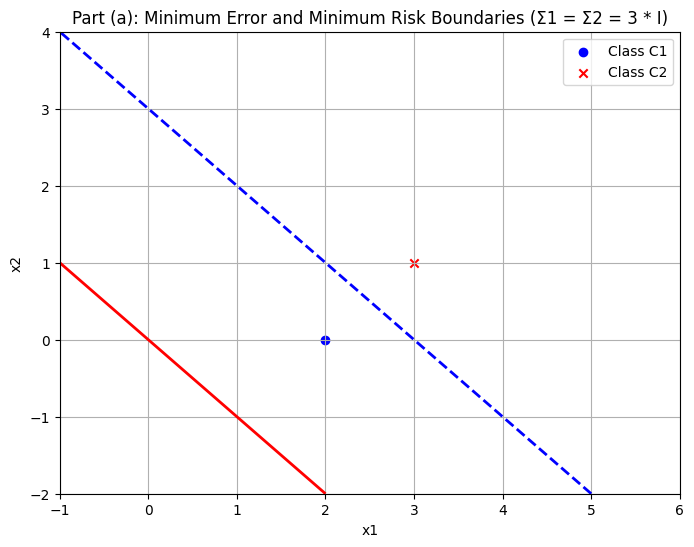

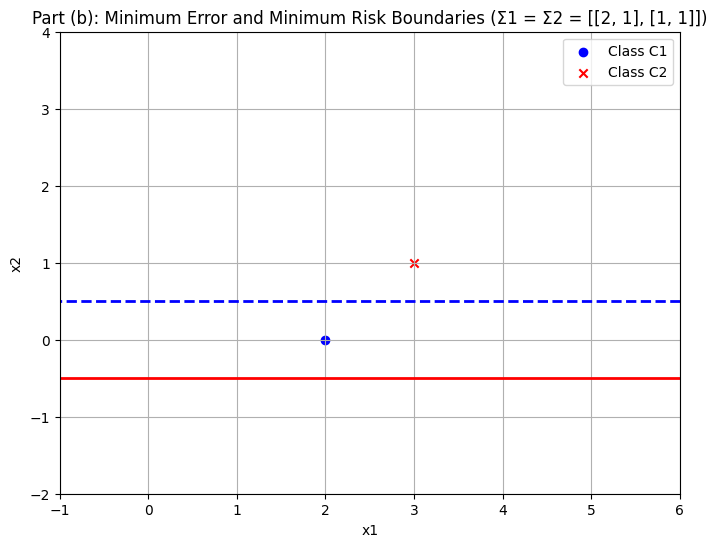

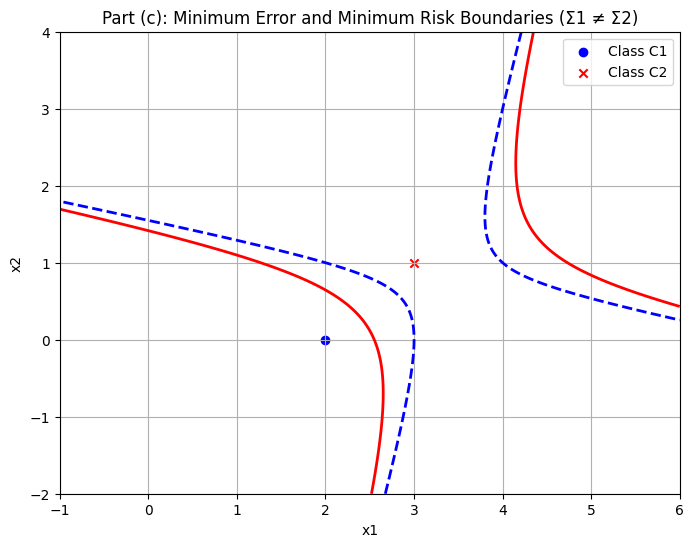

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define constants
mu1_a = np.array([2, 0])
mu2_a = np.array([3, 1])
sigma_a = 3 * np.eye(2)

mu1_b = np.array([2, 0])
mu2_b = np.array([3, 1])
sigma_b = np.array([[2, 1], [1, 1]])

mu1_c = np.array([2, 0])
mu2_c = np.array([3, 1])
sigma1_c = np.array([[2, 1], [1, 1]])
sigma2_c = np.array([[1, -1], [-1, 2]])

# Risk matrix
R = np.array([[0, 1], [np.e, 0]])
R12, R21 = R[0, 1], R[1, 0]

# Define the grid for plotting
x = np.linspace(-1, 6, 500)
y = np.linspace(-2, 4, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Function to plot contours for minimum error and minimum risk boundaries
def plot_contours(mu1, mu2, sigma1, sigma2, title, is_min_risk=False):
    # Define Gaussian PDFs
    rv1 = multivariate_normal(mu1, sigma1)
    rv2 = multivariate_normal(mu2, sigma2)
    
    # Minimum Error Boundary
    Z_err = np.log(rv1.pdf(pos)) - np.log(rv2.pdf(pos))
    
    # Minimum Risk Boundary
    if is_min_risk:
        Z_risk = np.log(rv1.pdf(pos) * R12) - np.log(rv2.pdf(pos) * R21)
    else:
        Z_risk = None

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z_err, levels=[0], colors='blue', linestyles='--', linewidths=2, label="Minimum Error Boundary")
    if Z_risk is not None:
        plt.contour(X, Y, Z_risk, levels=[0], colors='red', linestyles='-', linewidths=2, label="Minimum Risk Boundary")
    
    # Plot settings
    plt.scatter(mu1[0], mu1[1], marker='o', color='blue', label="Class C1")
    plt.scatter(mu2[0], mu2[1], marker='x', color='red', label="Class C2")
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Part (a): Plot for same covariance matrices (Σ = 3 * I)
plot_contours(mu1_a, mu2_a, sigma_a, sigma_a, "Part (a): Minimum Error and Minimum Risk Boundaries (Σ1 = Σ2 = 3 * I)", is_min_risk=True)

# Part (b): Plot for same covariance matrices (Σ = [[2, 1], [1, 1]])
plot_contours(mu1_b, mu2_b, sigma_b, sigma_b, "Part (b): Minimum Error and Minimum Risk Boundaries (Σ1 = Σ2 = [[2, 1], [1, 1]])", is_min_risk=True)

# Part (c): Plot for different covariance matrices (Σ1 = [[2, 1], [1, 1]], Σ2 = [[1, -1], [-1, 2]])
plot_contours(mu1_c, mu2_c, sigma1_c, sigma2_c, "Part (c): Minimum Error and Minimum Risk Boundaries (Σ1 ≠ Σ2)", is_min_risk=True)


In [3]:
# Function to calculate and print the separating lines' equations
def print_decision_boundary_equations(mu1, mu2, sigma1, sigma2, is_min_risk=False):
    # Calculate Sigma inverses and terms for decision boundary
    sigma1_inv = np.linalg.inv(sigma1)
    sigma2_inv = np.linalg.inv(sigma2)
    
    # Minimum error separating line terms
    w_err = sigma1_inv @ mu1 - sigma2_inv @ mu2
    w0_err = -0.5 * (mu1.T @ sigma1_inv @ mu1 - mu2.T @ sigma2_inv @ mu2) + \
              0.5 * np.log(np.linalg.det(sigma2) / np.linalg.det(sigma1))
    
    print(f"Minimum Error Boundary Equation: ({w_err[0]:.2f})*x1 + ({w_err[1]:.2f})*x2 + ({w0_err:.2f}) = 0")

    if is_min_risk:
        # Adjusted weights for minimum risk boundary
        w_risk = w_err
        w0_risk = w0_err + np.log(R12 / R21)
        print(f"Minimum Risk Boundary Equation: ({w_risk[0]:.2f})*x1 + ({w_risk[1]:.2f})*x2 + ({w0_risk:.2f}) = 0")

# Show equations for parts a, b, and c
print("Equations for Part (a):")
print_decision_boundary_equations(mu1_a, mu2_a, sigma_a, sigma_a, is_min_risk=True)

print("\nEquations for Part (b):")
print_decision_boundary_equations(mu1_b, mu2_b, sigma_b, sigma_b, is_min_risk=True)

print("\nEquations for Part (c):")
print_decision_boundary_equations(mu1_c, mu2_c, sigma1_c, sigma2_c, is_min_risk=True)


Equations for Part (a):
Minimum Error Boundary Equation: (-0.33)*x1 + (-0.33)*x2 + (1.00) = 0
Minimum Risk Boundary Equation: (-0.33)*x1 + (-0.33)*x2 + (0.00) = 0

Equations for Part (b):
Minimum Error Boundary Equation: (0.00)*x1 + (-1.00)*x2 + (0.50) = 0
Minimum Risk Boundary Equation: (0.00)*x1 + (-1.00)*x2 + (-0.50) = 0

Equations for Part (c):
Minimum Error Boundary Equation: (-5.00)*x1 + (-6.00)*x2 + (10.50) = 0
Minimum Risk Boundary Equation: (-5.00)*x1 + (-6.00)*x2 + (9.50) = 0
